<p style="font-family: Cambria; text-align: center; font-size: 48px;"> II. Predictive  Analysis</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score
import xgboost as xgb


In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [7]:
df1=pd.read_excel("C:/Users/rames/Downloads/GDM/GDM_DataDivers.xlsx")

In [8]:
df2=df1.copy()

### Early Risk Prediction of Gestational Diabetes Mellitus (GDM)

**Research Hypotheses:**

- **Null Hypothesis (H₀):** Gestational Diabetes Mellitus (GDM) is *not* significantly associated with adverse pregnancy outcomes or complications.
- **Alternative Hypothesis (H₁):** Gestational Diabetes Mellitus (GDM) *is* significantly associated with adverse pregnancy outcomes and complications.

In [12]:
mean_weeks = df1['Gestational Age_V1'].mean() / 7
print(f"Mean gestational age_V1 in weeks: {mean_weeks:.2f}")

Mean gestational age_V1 in weeks: 13.59


#### The average first prenatal visit women is at  arround 14 weeks in our dataset.
#### Our **objective** is to evaluate the predictive power of the early indicators through statistical testing and modeling.

###  **Reasoning (Why is it important)**

* **Early identification** of at-risk women allows for **early lifestyle or therapeutic interventions**.
* Can **prevent GDM-related complications** (e.g., macrosomia, pre-eclampsia, stillbirth).
* Enables **personalized prenatal care** before routine screening (\~24–28 weeks).
* Reduces long-term maternal risk and poor neonatal outcomes.

### Chosen Parameters and Their Connection to Hypothesis

| **Feature**                          | **Why it’s Included**                                                                 |
|--------------------------------------|----------------------------------------------------------------------------------------|
| **Age > 30**                         | Older age is a known risk factor for insulin resistance and GDM                        |
| **BMIinV1**                          | Obesity is strongly associated with insulin resistance and gestational diabetes        |
| **PreviousGDM10 V1**                 | History of GDM is a strong predictor of recurrence in subsequent pregnancies           |
| **Smoking 123**                      | Lifestyle behavior that may influence insulin sensitivity and glucose metabolism       |
| **HighRisk**                         | Predefined risk profile capturing multiple vulnerability factors                       |
| **Chronic Illness**                  | Underlying health issues may increase the metabolic burden and insulin resistance      |
| **GestationalHP**                    | Hypertension in pregnancy is often associated with poor glucose regulation             |
| **Took Vit D Supplements**           | May indicate proactive management of known Vitamin D deficiency risk                   |
| **Vit D Deficiency**                | Vitamin D plays a role in insulin secretion and sensitivity                            |
| **SystolicBP_V1 / DiastolicBP_V1**  | Hypertension is linked to metabolic syndrome and gestational complications             |
| **PulseinV1**                        | Elevated resting heart rate may reflect sympathetic activation and metabolic stress    |
| **Platelet_V1**                      | Platelet abnormalities may reflect inflammation or vascular dysfunction                |
| **Calcium_V1**                       | Calcium is involved in insulin-mediated intracellular processes                         |
| **Albumin_V1**                       | Low albumin may indicate poor nutritional or inflammatory status                       |
| **U Protein_V1 / U Albumin_V1**      | Proteinuria can be a sign of kidney stress or preeclampsia risk                        |
| **ALT_V1**                           | Elevated liver enzymes may indicate fatty liver or insulin resistance                  |
| **V1 CRP.1**                         | C-reactive protein is a marker of systemic inflammation linked to insulin resistance   |
| **V1 Creatinine.1**                  | Kidney function is critical in pregnancy; dysfunction may be linked to GDM             |
| **Hemoglobin_V1**                    | Anemia or altered oxygen transport can affect metabolic and pregnancy outcomes         |
| **White Cell Count**                | Inflammation marker; elevated counts may reflect systemic metabolic stress             |
| **V1 PCR.1**                         | Protein-to-creatinine ratio reflects renal function, relevant in hypertensive GDM      |
| **Nutritional counselling**          | Behavioral intervention indicator for managing metabolic risks                         |

---

### Target Variable

| **Feature**            | **Why it’s Included**                                                          |
|------------------------|---------------------------------------------------------------------------------|
| **GDM Diagonised**     | Target variable indicating the presence (1) or absence (0) of gestational diabetes |


### Correlation Check for GDM Diagnosis

##### Since the data isn't normally distributed, we used Spearman’s correlation to check how each clinical feature is related to the GDM diagnosis (Yes = 1, No = 0).

In [18]:
df=df1.copy()

In [20]:
# Map GDM to binary
df1['GDM_binary'] = df1['GDM Diagonised'].map({'Yes': 1, 'No': 0})

# Define the feature list
features = ['systolicBP_V1', 'diastolicBP_V1', 'PulseinV1', 'Platelet_V1', 
            'Calcium_V1', 'Albumin_V1', 'U Protein_V1', 'ALT_V1', 
            'U Albumin_V1', 'V1 CRP.1', 'V1 Creatinine.1', 'Hemoglobin_V1','White Cell Count',
            'V1 PCR.1', 'BMIinV1']

# Check and filter valid features
valid_features = [f for f in features if f in df1.columns]

# Calculate Spearman correlation with GDM_binary
corr_spearman = df1[valid_features + ['GDM_binary']].corr(method='spearman')['GDM_binary'].drop('GDM_binary')

# Print sorted results
corr_spearman.sort_values(ascending=False)

V1 CRP.1            0.150546
PulseinV1           0.148724
BMIinV1             0.133116
White Cell Count    0.123750
Platelet_V1         0.112980
diastolicBP_V1      0.092703
Calcium_V1          0.091657
systolicBP_V1       0.088896
ALT_V1              0.084171
U Protein_V1        0.074699
V1 PCR.1            0.070136
Hemoglobin_V1       0.006601
V1 Creatinine.1    -0.019262
Albumin_V1         -0.113102
U Albumin_V1       -0.125247
Name: GDM_binary, dtype: float64

In [24]:
results = {}

for col in ['systolicBP_V1', 'diastolicBP_V1','White Cell Count', 'PulseinV1','Platelet_V1', 'Calcium_V1', 'Albumin_V1', 'U Protein_V1', 'ALT_V1', 'U Albumin_V1','V1 CRP.1','V1 Creatinine.1', 'Hemoglobin_V1','V1 PCR.1','BMIinV1']:
    group_yes = df[df['GDM Diagonised'].str.lower() == 'yes'][col].dropna()
    group_no = df[df['GDM Diagonised'].str.lower() == 'no'][col].dropna()
    
    if len(group_yes) > 0 and len(group_no) > 0:
        stat, p = mannwhitneyu(group_yes, group_no, alternative='two-sided')
        results[col] = {
            'U-statistic': round(stat, 3),
            'p-value': round(p, 5),
            'Chance of randomness (%)': round(p * 100, 2)
        }
    else:
        results[col] = {
            'U-statistic': None,
            'p-value': None,
            'Chance of randomness (%)': None
        }

pd.DataFrame(results).T.sort_values('p-value')

,U-statistic,p-value,Chance of randomness (%)
PulseinV1,22091.5,0.00049,0.05
V1 CRP.1,17671.0,0.00071,0.07
BMIinV1,21627.0,0.00180,0.18
White Cell Count,21299.5,0.00374,0.37
Platelet_V1,20978.5,0.00813,0.81
diastolicBP_V1,20417.5,0.02973,2.97
U Albumin_V1,4153.0,0.03243,3.24
systolicBP_V1,20304.5,0.03712,3.71
ALT_V1,17411.0,0.05499,5.50
Albumin_V1,4392.5,0.06228,6.23


- Pulse rate, CRP,White Cell Count, BMI, and Platelet, white cell count show higher correlation and low p-values, which means they are consistently elevated in women diagnosed with GDM. These could be strong early indicators.
- Blood pressure values, ALT, and Albumin also show some difference, though not as strong—they may help as supporting features in prediction.
- Hemoglobin and Creatinine have very low correlation and high p-values, so they likely don’t relate to GDM in your data.
- The chance of randomness (based on p-value) is low for the top features, which means it’s unlikely that these differences happened by accident. That gives more confidence in using them for early GDM prediction


##### Checking for the Categorical values

In [28]:
# Define binary health markers and outcome
markers = ['Age_gt_30', 'Vit D Deficiency', 'Smoking 123','PreviousGDM10 V1','Nutritional counselling','HighRisk','Chronic Illness','GestationalHP','Took Vit D Supplements']
results = {}

for marker in markers:
    # Create contingency table
    contingency = pd.crosstab(df[marker], df['GDM Diagonised'])
    
    # Run chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency)
    results[marker] = {'Chi2': chi2, 'p-value': p}

# Convert to DataFrame for a cleaner view
correlation_df = pd.DataFrame(results).T
print(correlation_df.sort_values('p-value'))

                               Chi2        p-value
Nutritional counselling  512.854705  4.315348e-112
GestationalHP            495.051278  7.876842e-106
PreviousGDM10 V1          24.557809   4.648786e-06
Took Vit D Supplements    12.357633   1.488082e-02
Vit D Deficiency           8.240258   1.624242e-02
HighRisk                   4.013410   1.344309e-01
Age_gt_30                  3.405225   1.822069e-01
Smoking 123                5.992763   4.240013e-01
Chronic Illness            0.714893   6.994601e-01


- Use Nutritional Counselling, Previous GDM, and Vitamin D Deficiency confidently in our early prediction models.
- Keeping Age and HighRisk flags as possibly relevant

In [31]:
selected_columns = ['systolicBP_V1', 'diastolicBP_V1', 'PulseinV1', 'BMIinV1', 
                    'Smoking 123', 'PreviousGDM10 V1', 'Chronic Illness', 'Age_gt_30',
                    'Platelet_V1', 'Albumin_V1', 'U Albumin_V1', 'U Protein_V1',
                    'ALT_V1', 'V1 CRP.1', 'Vit D Deficiency','HighRisk','GestationalHP', 
                    'Took Vit D Supplements', 'Nutritional counselling','White Cell Count','GDM Diagonised']

df_final = df[selected_columns]


In [33]:
df_final.shape

(565, 21)

Separating the records based on the GDM diagnosed

In [36]:
# Filter rows where GDM was diagnosed
gdm_positive_df = df_final [df_final['GDM Diagonised'] == 'Yes']
gdm_negative_df = df_final [df_final['GDM Diagonised'] == 'No']


In [38]:
gdm_positive_df.isna().sum()
null_counts = gdm_positive_df.isnull().sum()
null_percent = (null_counts / len(gdm_positive_df)) * 100
null_summary = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percent})
print(null_summary)


                         Null Count  Null Percentage
systolicBP_V1                     0         0.000000
diastolicBP_V1                    0         0.000000
PulseinV1                         0         0.000000
BMIinV1                           0         0.000000
Smoking 123                       0         0.000000
PreviousGDM10 V1                  0         0.000000
Chronic Illness                   0         0.000000
Age_gt_30                         0         0.000000
Platelet_V1                       0         0.000000
Albumin_V1                       27        36.486486
U Albumin_V1                     34        45.945946
U Protein_V1                      0         0.000000
ALT_V1                            7         9.459459
V1 CRP.1                         11        14.864865
Vit D Deficiency                  0         0.000000
HighRisk                          0         0.000000
GestationalHP                     0         0.000000
Took Vit D Supplements            0         0.

In [40]:
gdm_negative_df.isna().sum()
null_counts = gdm_negative_df.isnull().sum()
null_percent = (null_counts / len(gdm_negative_df)) * 100
null_summary = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percent})
print(null_summary)

                         Null Count  Null Percentage
systolicBP_V1                     0         0.000000
diastolicBP_V1                    0         0.000000
PulseinV1                         0         0.000000
BMIinV1                           0         0.000000
Smoking 123                       0         0.000000
PreviousGDM10 V1                  0         0.000000
Chronic Illness                   0         0.000000
Age_gt_30                         0         0.000000
Platelet_V1                       1         0.209644
Albumin_V1                      251        52.620545
U Albumin_V1                    224        46.960168
U Protein_V1                      4         0.838574
ALT_V1                           23         4.821803
V1 CRP.1                         33         6.918239
Vit D Deficiency                  0         0.000000
HighRisk                          0         0.000000
GestationalHP                     0         0.000000
Took Vit D Supplements            0         0.

For non-GDM patients, we retain only records with complete values for the selected features. These filtered records will be used for undersampling, effectively avoiding the need for handling missing values in this group.

In [43]:
# Again, exclude the label-encoded column itself
columns_to_check = gdm_negative_df.columns

# Filter where GDM = 0 and other columns are not null
filtered_df_0 = gdm_negative_df[
    (gdm_negative_df['GDM Diagonised'] == 'No') & 
    gdm_negative_df[columns_to_check].notnull().all(axis=1)
]
filtered_df_0.shape

(139, 21)

Undersampling the non gdm patients

In [46]:
filtered_df_0_sampled = filtered_df_0.sample(n=74, random_state=42)

In [48]:
# Again, exclude the label-encoded column itself
columns_to_check = gdm_positive_df.columns

# Filter where GDM = 0 and other columns are not null
filtered_df_1 = gdm_positive_df[
    (gdm_positive_df['GDM Diagonised'] == 'Yes') 
   
]
filtered_df_1.shape

(74, 21)

We combine the non-GDM records with complete data and the GDM records to create a consolidated dataset. This combined data will be used for model training, validation, and testing.

In [51]:
# Append df2 to df1 (row-wise)
combined_df = pd.concat([filtered_df_0_sampled, filtered_df_1], axis=0, ignore_index=True)

print(combined_df.shape)
df=combined_df.copy()


(148, 21)


To handle missing values in the medical features Albumin_V1, U Albumin_V1, ALT_V1, and V1 CRP.1, we use a strategy tailored to GDM diagnosis status:

For patients diagnosed with GDM, we use K-Means clustering to impute missing values. This method captures underlying patterns while retaining important data from this smaller subgroup.

For non-GDM cases, we take advantage of the large sample size by removing records with missing values, ensuring that only complete and reliable data are used.

To prevent class imbalance, we will apply undersampling to the filtered non-GDM group.

This selective imputation strategy aims to maintain data quality, minimize noise, and improve the robustness of our predictive model.

In [54]:
df.shape

(148, 21)

In [56]:
# Columns to impute
cols = ['Albumin_V1', 'U Albumin_V1', 'ALT_V1', 'V1 CRP.1']

# Step 1: Work on a copy of the dataframe with only relevant columns
df_kmeans = df[cols].copy()

# Step 2: Temporarily fill missing values with column means to perform clustering
df_temp = df_kmeans.fillna(df_kmeans.mean())

# Step 3: Normalize the data
scaler = StandardScaler()
scaled = scaler.fit_transform(df_temp)

# Step 4: Apply KMeans clustering (choose k based on elbow or domain knowledge)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled)

# Add cluster labels to temp dataframe
df_temp['cluster'] = clusters
df_kmeans['cluster'] = clusters

# Step 5: Impute missing values with cluster-wise mean
for col in cols:
    for cluster_id in df_kmeans['cluster'].unique():
        mean_val = df_kmeans.loc[
            (df_kmeans['cluster'] == cluster_id) & (df_kmeans[col].notnull()), col
        ].mean()
        df_kmeans.loc[
            (df_kmeans['cluster'] == cluster_id) & (df_kmeans[col].isnull()), col
        ] = mean_val

# Step 6: Drop the helper 'cluster' column and update main df
df_kmeans.drop(columns='cluster', inplace=True)
df[cols] = df_kmeans


C:\Users\rames\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [57]:
df.isnull().sum()
#Imputed the null values


systolicBP_V1              0
diastolicBP_V1             0
PulseinV1                  0
BMIinV1                    0
Smoking 123                0
PreviousGDM10 V1           0
Chronic Illness            0
Age_gt_30                  0
Platelet_V1                0
Albumin_V1                 0
U Albumin_V1               0
U Protein_V1               0
ALT_V1                     0
V1 CRP.1                   0
Vit D Deficiency           0
HighRisk                   0
GestationalHP              0
Took Vit D Supplements     0
Nutritional counselling    0
White Cell Count           0
GDM Diagonised             0
dtype: int64

In [58]:
df.select_dtypes(include='object').columns.to_list()

['Smoking 123',
 'Age_gt_30',
 'Vit D Deficiency',
 'GestationalHP',
 'Took Vit D Supplements',
 'Nutritional counselling',
 'GDM Diagonised']

Label Encoding the categorical field

In [63]:
from sklearn.preprocessing import LabelEncoder

# Columns to convert to integers
object_columns = [
    'Smoking 123',
    'Age_gt_30',
    'Vit D Deficiency',
    'GestationalHP',
    'Took Vit D Supplements',
    'Nutritional counselling',
    'GDM Diagonised'
]

# Dictionary to store label mappings
label_mappings = {}

# Apply encoding
for col in object_columns:
    df.loc[:, col] = df[col].astype(str)  # ensure all values are strings
    le = LabelEncoder()
    df.loc[:, col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mappings (optional)
for col, mapping in label_mappings.items():
    print(f"Mapping for '{col}': {mapping}")

Mapping for 'Smoking 123': {'1': 0, '2': 1, '3': 2, 'NR': 3}
Mapping for 'Age_gt_30': {'No': 0, 'Yes': 1}
Mapping for 'Vit D Deficiency': {'No': 0, 'Yes': 1}
Mapping for 'GestationalHP': {'0': 0, '1': 1}
Mapping for 'Took Vit D Supplements': {'NR': 0, 'No': 1, 'Yes': 2}
Mapping for 'Nutritional counselling': {'No': 0, 'Yes': 1}
Mapping for 'GDM Diagonised': {'No': 0, 'Yes': 1}


In [65]:
 df.head()

,systolicBP_V1,diastolicBP_V1,PulseinV1,BMIinV1,Smoking 123,PreviousGDM10 V1,Chronic Illness,Age_gt_30,Platelet_V1,Albumin_V1,U Albumin_V1,U Protein_V1,ALT_V1,V1 CRP.1,Vit D Deficiency,HighRisk,GestationalHP,Took Vit D Supplements,Nutritional counselling,White Cell Count,GDM Diagonised
0,117,74,87,22.088295,2,0,0,1,217.0,38.7,5.0,0.11,18.0,11.6,0,0,0,1,0,10.47,0
1,105,58,83,35.459336,0,0,0,0,220.0,35.1,5.0,0.04,27.0,10.7,1,0,0,1,0,13.20,0
2,116,58,62,29.832411,1,0,0,0,282.0,40.9,5.0,0.13,11.0,8.6,1,0,0,2,0,10.15,0
3,122,76,65,25.813507,2,0,0,1,193.0,39.5,5.0,0.10,6.0,9.2,1,0,0,1,0,16.20,0
4,115,56,88,27.025992,2,0,0,0,290.0,45.0,5.0,0.12,8.0,5.6,0,0,0,1,0,11.87,0


In [67]:
# Get list of object dtype columns
column_names = df.select_dtypes(include='object').columns.to_list()

# Convert each column in the list to numeric
for col in column_names:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [68]:
df.dtypes


systolicBP_V1                int64
diastolicBP_V1               int64
PulseinV1                    int64
BMIinV1                    float64
Smoking 123                  int64
PreviousGDM10 V1             int64
Chronic Illness              int64
Age_gt_30                    int64
Platelet_V1                float64
Albumin_V1                 float64
U Albumin_V1               float64
U Protein_V1               float64
ALT_V1                     float64
V1 CRP.1                   float64
Vit D Deficiency             int64
HighRisk                     int64
GestationalHP                int64
Took Vit D Supplements       int64
Nutritional counselling      int64
White Cell Count           float64
GDM Diagonised               int64
dtype: object

In [71]:
df.shape

(148, 21)

In [73]:
df.isna().sum()

systolicBP_V1              0
diastolicBP_V1             0
PulseinV1                  0
BMIinV1                    0
Smoking 123                0
PreviousGDM10 V1           0
Chronic Illness            0
Age_gt_30                  0
Platelet_V1                0
Albumin_V1                 0
U Albumin_V1               0
U Protein_V1               0
ALT_V1                     0
V1 CRP.1                   0
Vit D Deficiency           0
HighRisk                   0
GestationalHP              0
Took Vit D Supplements     0
Nutritional counselling    0
White Cell Count           0
GDM Diagonised             0
dtype: int64

In [76]:
# Separate features and target
X = df.drop('GDM Diagonised', axis=1)
y = df['GDM Diagonised']

# Split the dataset (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Optionally scale numeric features only
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


X_train.shape

(103, 20)

In [77]:
models=[]
models.append(('LogisticRegression', LogisticRegression(max_iter=1000)))
models.append(('Naive Bayes',GaussianNB()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=3)))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append((' Neural Network Classifier()', MLPClassifier()))
models.append(('XGBClassifier',XGBClassifier()))
models.append(('SVM', SVC(kernel='linear', C=1.0, random_state=42)))



LogisticRegression LogisticRegression(max_iter=1000)


Accuracy: 95.56%
Precision: 100.00%
Recall: 90.48%
F1 Score: 95.00%
ROC AUC Score: 98.41%


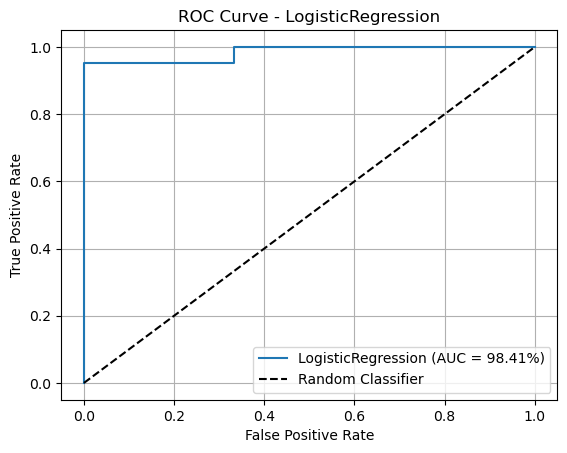



Naive Bayes GaussianNB()


Accuracy: 95.56%
Precision: 95.24%
Recall: 95.24%
F1 Score: 95.24%
ROC AUC Score: 97.22%


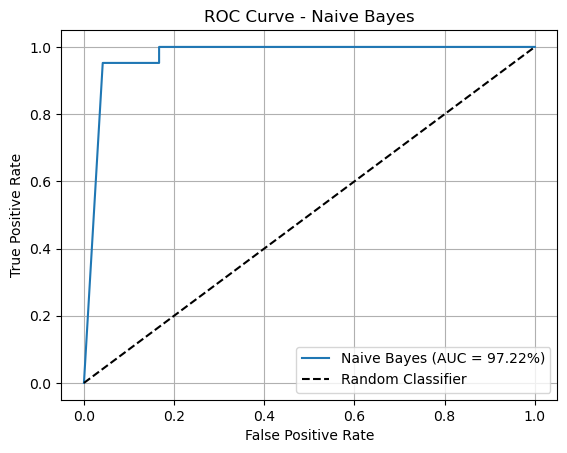



KNN KNeighborsClassifier(n_neighbors=3)


Accuracy: 88.89%
Precision: 94.44%
Recall: 80.95%
F1 Score: 87.18%
ROC AUC Score: 92.76%


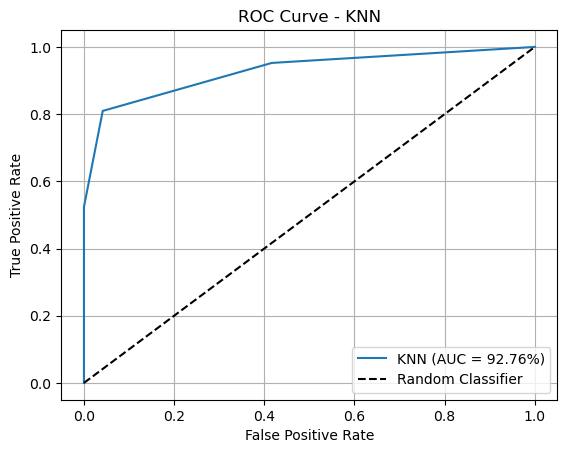



RandomForestClassifier RandomForestClassifier()


Accuracy: 97.78%
Precision: 100.00%
Recall: 95.24%
F1 Score: 97.56%
ROC AUC Score: 100.00%


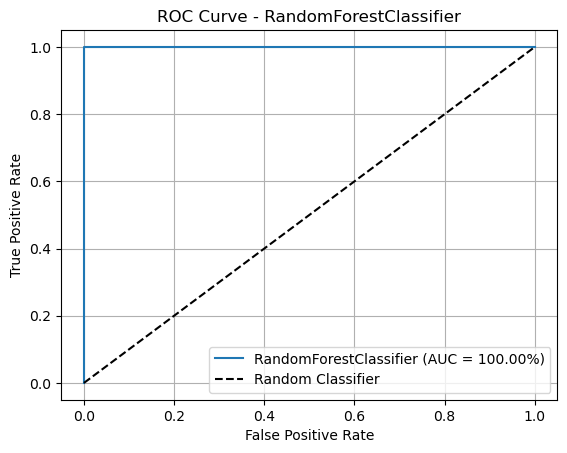



DecisionTreeClassifier DecisionTreeClassifier()


Accuracy: 97.78%
Precision: 100.00%
Recall: 95.24%
F1 Score: 97.56%
ROC AUC Score: 97.62%


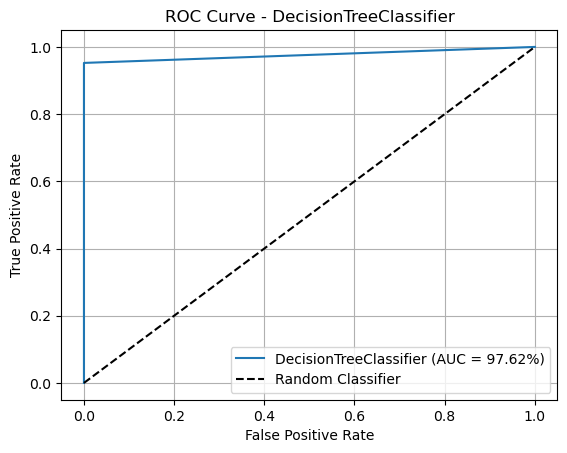



 Neural Network Classifier() MLPClassifier()



C:\Users\rames\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Accuracy: 91.11%
Precision: 94.74%
Recall: 85.71%
F1 Score: 90.00%
ROC AUC Score: 94.44%


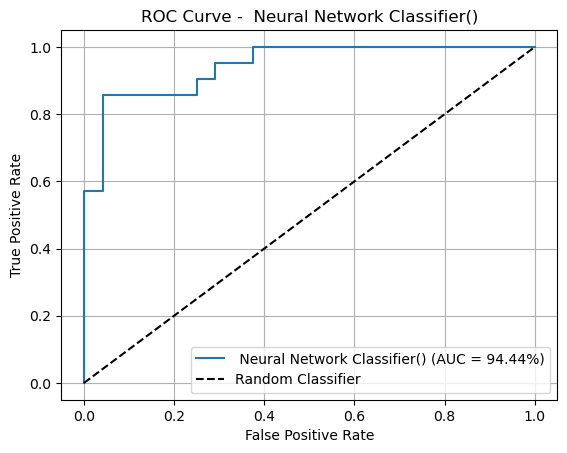



XGBClassifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%
ROC AUC Score: 100.00%


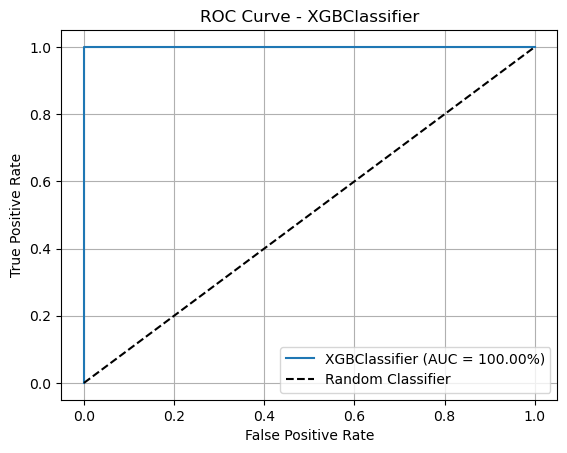



SVM SVC(kernel='linear', random_state=42)


Accuracy: 95.56%
Precision: 100.00%
Recall: 90.48%
F1 Score: 95.00%
ROC AUC Score: 92.66%


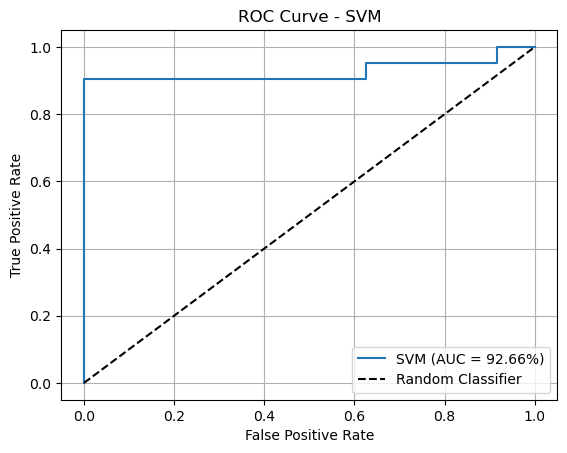

In [80]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

for name, model in models:
    print('\n')
    print(name, model)
    print()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # If needed for roc_auc_score
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # fallback for models that don't have predict_proba (e.g., SVM with kernel)
        y_proba = model.decision_function(X_test)

    # changing the values into %
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    auc = roc_auc_score(y_test, y_proba) * 100

   # print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nAccuracy: {:.2f}%".format(accuracy))
    print("Precision: {:.2f}%".format(precision))
    print("Recall: {:.2f}%".format(recall))
    print("F1 Score: {:.2f}%".format(f1))
    print("ROC AUC Score: {:.2f}%".format(auc))
   # print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f}%)')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

for name, model in models:
    print("\n" + "="*40)
    print(f"Model: {name}")
    print("="*40 + "\n")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    # Print metrics and confusion matrix
    #print("Confusion Matrix:")
    #print(confusion_matrix(y_test, y_pred), "\n")
    
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%\n")
    
    #print("Classification Report:")
    #print(classification_report(y_test, y_pred))



Model: LogisticRegression

Accuracy: 95.56%
Precision: 100.00%
Recall: 90.48%
F1 Score: 95.00%


Model: Naive Bayes

Accuracy: 95.56%
Precision: 95.24%
Recall: 95.24%
F1 Score: 95.24%


Model: KNN

Accuracy: 88.89%
Precision: 94.44%
Recall: 80.95%
F1 Score: 87.18%


Model: RandomForestClassifier

Accuracy: 97.78%
Precision: 100.00%
Recall: 95.24%
F1 Score: 97.56%


Model: DecisionTreeClassifier

Accuracy: 97.78%
Precision: 100.00%
Recall: 95.24%
F1 Score: 97.56%


Model:  Neural Network Classifier()



C:\Users\rames\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 91.11%
Precision: 100.00%
Recall: 80.95%
F1 Score: 89.47%


Model: XGBClassifier

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%


Model: SVM

Accuracy: 95.56%
Precision: 100.00%
Recall: 90.48%
F1 Score: 95.00%



In [86]:
from sklearn.metrics import accuracy_score

for name, model in models:
    print('\n')
    print(name, model)
    print()

    model.fit(X_train, y_train)

    # Training accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100

    # Testing accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100

    print(f"Training Accuracy: {train_accuracy:.2f}%")
    print(f"Testing Accuracy: {test_accuracy:.2f}%")

    # Bias and variance indication
    if abs(train_accuracy - test_accuracy) < 5:
        print("✅ Low bias, low variance (well-balanced)")
    elif train_accuracy > test_accuracy:
        print("⚠️ High variance (overfitting)")
    else:
        print("⚠️ High bias (underfitting)")




LogisticRegression LogisticRegression(max_iter=1000)

Training Accuracy: 97.09%
Testing Accuracy: 95.56%
✅ Low bias, low variance (well-balanced)


Naive Bayes GaussianNB()

Training Accuracy: 98.06%
Testing Accuracy: 95.56%
✅ Low bias, low variance (well-balanced)


KNN KNeighborsClassifier(n_neighbors=3)

Training Accuracy: 95.15%
Testing Accuracy: 88.89%
⚠️ High variance (overfitting)


RandomForestClassifier RandomForestClassifier()

Training Accuracy: 100.00%
Testing Accuracy: 97.78%
✅ Low bias, low variance (well-balanced)


DecisionTreeClassifier DecisionTreeClassifier()

Training Accuracy: 100.00%
Testing Accuracy: 97.78%
✅ Low bias, low variance (well-balanced)


 Neural Network Classifier() MLPClassifier()

Training Accuracy: 99.03%
Testing Accuracy: 91.11%
⚠️ High variance (overfitting)


XGBClassifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, e

C:\Users\rames\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Final Model Selection for GDM Prediction

Two models were selected based on a combination of performance metrics and explainability:


### Random Forest Classifier
- **Accuracy**: 97.78%
- **Precision**: 100.00%
- **Recall**: 95.24%
- **F1 Score**: 97.56%
- **Strengths**:
  - Excellent predictive performance
  - Provides feature importance scores for insight into decision-making
- **Usage**:
  - Suitable for robust prediction tasks with moderate interpretability

### Logistic Regression
- **Accuracy**: 95.56%
- **Precision**: 100.00%
- **Recall**: 90.48%
- **F1 Score**: 95.00%
- **Strengths**:
  - High interpretability via model coefficients
  - Ideal for understanding the impact of individual risk factors
- **Usage**:
  - Useful for clinical reporting and risk communication
  - Coefficients can be translated into odds ratios

---

###  Summary Table

| Model                  | F1 Score | Accuracy | Precision | Recall | Notes                                 |
|------------------------|----------|----------|-----------|--------|---------------------------------------|
| RandomForestClassifier | 97.56%   | 97.78%   | 100.00%   | 95.24% | High performance + feature importance |
| LogisticRegression     | 95.00%   | 95.56%   | 100.00%   | 90.48% | Interpretable + clinically trusted    |

---
